In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files
from tabulate import tabulate
import plotly.graph_objects as go
import plotly.express as px

In [153]:
box_match = pd.read_csv("/content/Games of the Future 2024 - BoxMatch.csv")
box_match

,Date,Stage,Match,Team,Ban,Role Ban,Role Pick,Players,Pick,MVP,...,Spell,Talent 3,K,D,A,Gold,Rating,Medal,Level,Win
0,2/26/2024,Group Stage,1,RRQ Hoshi,Guinevere,Fighter,Mage,Octa,Novaria,0,...,Flicker,Impure Rage,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win
1,2/26/2024,Group Stage,1,RRQ Hoshi,Arlott,Fighter/Assassin,Fighter,Brusko,Chou,0,...,Flicker,Concussive Blast,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win
2,2/26/2024,Group Stage,1,RRQ Hoshi,Mathilda,Support/Assassin,Assassin/Fighter,Banana,Benedetta,0,...,Petrify,Quantum Charge,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win
3,2/26/2024,Group Stage,1,RRQ Hoshi,Minotaur,Tank/Support,Marksman,Skylar,Claude,1,...,Sprint,Quantum Charge,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win
4,2/26/2024,Group Stage,1,RRQ Hoshi,Kaja,Support/Fighter,Fighter/Tank,Irrad,Fredrinn,0,...,Retribution,Concussive Blast,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,3/2/2024,Playoffs Grand Final,4,AP.Bren,Joy,Assassin,Fighter,KyleTzy,Guinevere,0,...,Retribution,Impure Rage,1,1,3,9368,6.2,Silver,15,Win
636,3/2/2024,Playoffs Grand Final,4,AP.Bren,Nolan,Assassin,Fighter/Tank,Owgwen,Ruby,0,...,Flicker,Brave Smite,0,0,8,8681,8.4,Golden,15,Win
637,3/2/2024,Playoffs Grand Final,4,AP.Bren,Novaria,Mage,Mage,Pheww,Nana,0,...,Flicker,Lethal Ignition,1,0,6,9700,8.5,Golden,15,Win
638,3/2/2024,Playoffs Grand Final,4,AP.Bren,X.Borg,Fighter,Marksman,Super Marco,Beatrix,1,...,Flicker,Quantum Charge,7,0,3,14562,11.7,Golden,15,Win


In [154]:
box_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       640 non-null    object
 1   Stage      640 non-null    object
 2   Match      640 non-null    int64 
 3   Team       640 non-null    object
 4   Ban        640 non-null    object
 5   Role Ban   640 non-null    object
 6   Role Pick  640 non-null    object
 7   Players    640 non-null    object
 8   Pick       640 non-null    object
 9   MVP        640 non-null    int64 
 10  Time       640 non-null    object
 11  Spell      640 non-null    object
 12  Talent 3   640 non-null    object
 13  K          640 non-null    object
 14  D          640 non-null    object
 15  A          640 non-null    object
 16  Gold       640 non-null    object
 17  Rating     640 non-null    object
 18  Medal      640 non-null    object
 19  Level      640 non-null    object
 20  Win        640 non-null    objec

In [155]:
box_match.columns

Index(['Date', 'Stage', 'Match', 'Team', 'Ban', 'Role Ban', 'Role Pick',
       'Players', 'Pick', 'MVP', 'Time', 'Spell', 'Talent 3', 'K', 'D', 'A',
       'Gold', 'Rating', 'Medal', 'Level', 'Win'],
      dtype='object')

In [156]:
box_match.isnull().sum()

Date         0
Stage        0
Match        0
Team         0
Ban          0
Role Ban     0
Role Pick    0
Players      0
Pick         0
MVP          0
Time         0
Spell        0
Talent 3     0
K            0
D            0
A            0
Gold         0
Rating       0
Medal        0
Level        0
Win          0
dtype: int64

In [157]:
box_match.describe()

,Match,MVP
count,640.000000,640.000000
mean,1.703125,0.100000
std,0.722534,0.300235
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,2.000000,0.000000
max,4.000000,1.000000


# Data Cleaning

**Change Data Type**

In [158]:
# Ubah tipe data 'Medal' menjadi category (jika perlu)
box_match['Medal'] = box_match['Medal'].astype('category')

In [159]:
# Ubah tipe data kolom Date menjadi datetime
box_match['Date'] = pd.to_datetime(box_match['Date'])

# Ubah tipe data kolom yang seharusnya berisi angka menjadi numerik
numeric_columns = ['K', 'D', 'A', 'Gold', 'Rating', 'Level']
box_match[numeric_columns] = box_match[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ubah tipe data kolom Win menjadi boolean (jika nilainya 'Win' atau 'Loss')
box_match['Win'] = box_match['Win'].map({'Win': True, 'Loss': False})

# Tampilkan info tipe data setelah perubahan
box_match.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       640 non-null    datetime64[ns]
 1   Stage      640 non-null    object        
 2   Match      640 non-null    int64         
 3   Team       640 non-null    object        
 4   Ban        640 non-null    object        
 5   Role Ban   640 non-null    object        
 6   Role Pick  640 non-null    object        
 7   Players    640 non-null    object        
 8   Pick       640 non-null    object        
 9   MVP        640 non-null    int64         
 10  Time       640 non-null    object        
 11  Spell      640 non-null    object        
 12  Talent 3   640 non-null    object        
 13  K          600 non-null    float64       
 14  D          600 non-null    float64       
 15  A          600 non-null    float64       
 16  Gold       600 non-null    float64       
 1

In [160]:
unique_times = box_match['Time'].unique()

# Cetak nilai-nilai unik
print(unique_times)

['22:09' '18:24' '16:32' '17:13' '14:24' '16:56' '22:37' '17:52' '21:43'
 '14:55' '13:07' '13:05' '17:21' '20:12' '12:02' '13:24' '16:59' '25:15'
 '15:26' '22:40' '16:27' '30:53' '17:46' '14:43' '30:32' '11:18' '19:48'
 '15:49' '12:15' '20:41' '23:50' '22:20' '19:12' '11:56' '18:09' '13:20'
 '14:09' '14:36' '14:14' '14:32' '17:44' '11:22' '18:50' '18:23' '18:44'
 '16:06' '17:29' '19:36' '19:01' '15:16' '18:54' '13:03' '17:55' '14:06'
 '17:18' '21:30' '15:21' '27:55' '14:07' '22:16' '20:17' '17:16']


In [161]:
# Tambahkan jam ('00') ke nilai-nilai yang hanya memiliki format 'mm:ss'
box_match['Time'] = box_match['Time'].apply(lambda x: '00:' + x if len(x) == 5 else x)

# Konversi kolom 'Time' ke tipe data timedelta
box_match['Time'] = pd.to_timedelta(box_match['Time'])


In [162]:
box_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Date       640 non-null    datetime64[ns] 
 1   Stage      640 non-null    object         
 2   Match      640 non-null    int64          
 3   Team       640 non-null    object         
 4   Ban        640 non-null    object         
 5   Role Ban   640 non-null    object         
 6   Role Pick  640 non-null    object         
 7   Players    640 non-null    object         
 8   Pick       640 non-null    object         
 9   MVP        640 non-null    int64          
 10  Time       640 non-null    timedelta64[ns]
 11  Spell      640 non-null    object         
 12  Talent 3   640 non-null    object         
 13  K          600 non-null    float64        
 14  D          600 non-null    float64        
 15  A          600 non-null    float64        
 16  Gold       600 non-null   

In [163]:
box_match.head()

,Date,Stage,Match,Team,Ban,Role Ban,Role Pick,Players,Pick,MVP,...,Spell,Talent 3,K,D,A,Gold,Rating,Medal,Level,Win
0,2024-02-26,Group Stage,1,RRQ Hoshi,Guinevere,Fighter,Mage,Octa,Novaria,0,...,Flicker,Impure Rage,NaN,NaN,NaN,NaN,NaN,Nan,NaN,True
1,2024-02-26,Group Stage,1,RRQ Hoshi,Arlott,Fighter/Assassin,Fighter,Brusko,Chou,0,...,Flicker,Concussive Blast,NaN,NaN,NaN,NaN,NaN,Nan,NaN,True
2,2024-02-26,Group Stage,1,RRQ Hoshi,Mathilda,Support/Assassin,Assassin/Fighter,Banana,Benedetta,0,...,Petrify,Quantum Charge,NaN,NaN,NaN,NaN,NaN,Nan,NaN,True
3,2024-02-26,Group Stage,1,RRQ Hoshi,Minotaur,Tank/Support,Marksman,Skylar,Claude,1,...,Sprint,Quantum Charge,NaN,NaN,NaN,NaN,NaN,Nan,NaN,True
4,2024-02-26,Group Stage,1,RRQ Hoshi,Kaja,Support/Fighter,Fighter/Tank,Irrad,Fredrinn,0,...,Retribution,Concussive Blast,NaN,NaN,NaN,NaN,NaN,Nan,NaN,True


**Handle Missing Values**

In [164]:
# Mengisi nilai-nilai yang hilang dalam kolom 'K', 'D', dan 'A' dengan nilai median
median_K = box_match['K'].median()
median_D = box_match['D'].median()
median_A = box_match['A'].median()

box_match['K'].fillna(median_K, inplace=True)
box_match['D'].fillna(median_D, inplace=True)
box_match['A'].fillna(median_A, inplace=True)

# Mengisi nilai-nilai yang hilang dalam kolom 'Win' dengan nilai yang sesuai (misalnya, 'Unknown')
box_match['Win'].fillna('Unknown', inplace=True)


In [165]:
# Hitung nilai rata-rata atau median
mean_gold = box_match['Gold'].mean()
median_gold = box_match['Gold'].median()

mean_rating = box_match['Rating'].mean()
median_rating = box_match['Rating'].median()

mean_level = box_match['Level'].mean()
median_level = box_match['Level'].median()

# Isi missing values dengan nilai rata-rata atau median
box_match['Gold'].fillna(median_gold, inplace=True)
box_match['Rating'].fillna(median_rating, inplace=True)
box_match['Level'].fillna(median_level, inplace=True)


In [166]:
box_match.isnull().sum()

Date         0
Stage        0
Match        0
Team         0
Ban          0
Role Ban     0
Role Pick    0
Players      0
Pick         0
MVP          0
Time         0
Spell        0
Talent 3     0
K            0
D            0
A            0
Gold         0
Rating       0
Medal        0
Level        0
Win          0
dtype: int64

In [167]:
box_match.head()

,Date,Stage,Match,Team,Ban,Role Ban,Role Pick,Players,Pick,MVP,...,Spell,Talent 3,K,D,A,Gold,Rating,Medal,Level,Win
0,2024-02-26,Group Stage,1,RRQ Hoshi,Guinevere,Fighter,Mage,Octa,Novaria,0,...,Flicker,Impure Rage,2.0,2.0,5.0,10003.0,7.1,Nan,15.0,True
1,2024-02-26,Group Stage,1,RRQ Hoshi,Arlott,Fighter/Assassin,Fighter,Brusko,Chou,0,...,Flicker,Concussive Blast,2.0,2.0,5.0,10003.0,7.1,Nan,15.0,True
2,2024-02-26,Group Stage,1,RRQ Hoshi,Mathilda,Support/Assassin,Assassin/Fighter,Banana,Benedetta,0,...,Petrify,Quantum Charge,2.0,2.0,5.0,10003.0,7.1,Nan,15.0,True
3,2024-02-26,Group Stage,1,RRQ Hoshi,Minotaur,Tank/Support,Marksman,Skylar,Claude,1,...,Sprint,Quantum Charge,2.0,2.0,5.0,10003.0,7.1,Nan,15.0,True
4,2024-02-26,Group Stage,1,RRQ Hoshi,Kaja,Support/Fighter,Fighter/Tank,Irrad,Fredrinn,0,...,Retribution,Concussive Blast,2.0,2.0,5.0,10003.0,7.1,Nan,15.0,True


# Analysis

**Match Results**

In [168]:
# Ambil data dari hasil pertandingan
hasil_pertandingan = box_match['Win'].value_counts()

# Buat DataFrame dari hasil perhitungan
table_hasil_pertandingan = pd.DataFrame({
    'Hasil Pertandingan': hasil_pertandingan.index,
    'Jumlah Pertandingan': hasil_pertandingan.values
})

# Tampilkan tabel perhitungan
print(table_hasil_pertandingan)

  Hasil Pertandingan  Jumlah Pertandingan
0               True                  320
1            Unknown                  320


**Match Duration**

<ipython-input-169-e94deb84b20c>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




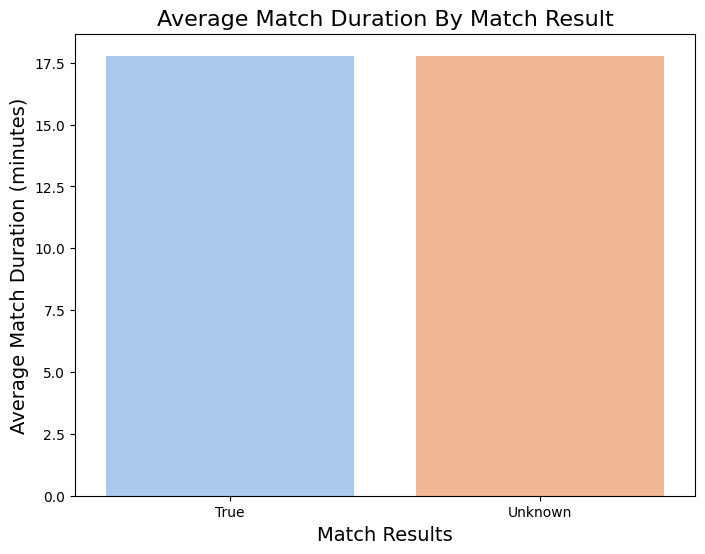

In [169]:
# Konversi kolom 'Time' menjadi tipe data timedelta
box_match['Time'] = pd.to_timedelta(box_match['Time'])

# Hitung rata-rata durasi pertandingan untuk setiap hasil pertandingan
durasi_pertandingan = box_match.groupby('Win')['Time'].mean()

# Konversi durasi pertandingan ke dalam menit
durasi_pertandingan_minutes = durasi_pertandingan.dt.total_seconds() / 60

# Visualisasikan rata-rata durasi pertandingan
plt.figure(figsize=(8, 6))
sns.barplot(x=durasi_pertandingan.index, y=durasi_pertandingan_minutes, palette='pastel')
plt.title('Average Match Duration By Match Result', fontsize=16)
plt.xlabel('Match Results', fontsize=14)
plt.ylabel('Average Match Duration (minutes)', fontsize=14)
plt.show()

**Match Per Stage**

In [170]:
# Hitung jumlah pertandingan untuk setiap tahap
total_matches_per_stage = box_match['Stage'].value_counts().reset_index()
total_matches_per_stage.columns = ['Stage', 'Total Matches']

# Sajikan hasil perhitungan dalam tabel
print(total_matches_per_stage)

                    Stage  Total Matches
0             Group Stage            340
1        Playoffs Round 1             90
2  Playoffs Quarterfinals             90
3     Playoffs Semifinals             50
4    Playoffs Grand Final             40
5    Playoffs Third Place             30


In [198]:
# Plot visualisasi menggunakan Plotly Express
fig = px.bar(total_matches_per_stage, x='Stage', y='Total Matches',
             title='Total Matches per Stage',
             labels={'Stage': 'Stage', 'Total Matches': 'Total Matches'},
             color='Stage', color_discrete_sequence=px.colors.qualitative.Pastel1)

# Tampilkan plot
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_xaxes(title_text='Stage')
fig.update_yaxes(title_text='Total Matches')
fig.show()

**Team progression**

In [172]:
team_progression = box_match.groupby('Team')['Stage'].max().sort_values(ascending=False).reset_index()
print("Team progression - Which teams made it till where:")
print(team_progression)

Team progression - Which teams made it till where:
                      Team                   Stage
0        Fire Flux Esports    Playoffs Third Place
1                RRQ Hoshi    Playoffs Third Place
2                 AP.Bren      Playoffs Semifinals
3                     ONIC     Playoffs Semifinals
4             BURN x FLASH        Playoffs Round 1
5           Burmese Ghouls        Playoffs Round 1
6                Deus Vult        Playoffs Round 1
7                 HomeBois        Playoffs Round 1
8   Royal Cybersports Club        Playoffs Round 1
9               Team Flash        Playoffs Round 1
10           Twisted Minds        Playoffs Round 1
11         Blacklist Intl.  Playoffs Quarterfinals
12         KeepBest Gaming             Group Stage
13      Niightmare Esports             Group Stage
14             S2G Esports             Group Stage
15             Team Lilgun             Group Stage


In [200]:
# Hitung jumlah tim pada setiap tahap
team_progression_count = team_progression['Stage'].value_counts().reset_index()
team_progression_count.columns = ['Stage', 'Count']

# Plot visualisasi menggunakan Plotly Express
fig = px.bar(team_progression_count, y='Stage', x='Count',
             title='Team Progression - Number of Teams at Each Stage',
             labels={'Stage': 'Stage', 'Count': 'Number of Teams'},
             color='Stage', color_discrete_sequence=px.colors.qualitative.Pastel1,
             orientation='h')

# Tampilkan plot
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.update_xaxes(title_text='Number of Teams')
fig.update_yaxes(title_text='Stage')
fig.show()

**Top 10 Hero Banned**

In [174]:
most_banned_heroes = box_match['Ban'].str.split(',', expand=True).stack().value_counts().head(10)

most_banned_heroes_df = pd.DataFrame({'Hero': most_banned_heroes.index, 'Total': most_banned_heroes.values})

most_banned_heroes_df

,Hero,Total
0,Joy,57
1,Mathilda,56
2,Novaria,36
3,Nolan,35
4,Guinevere,34
5,Faramis,32
6,Arlott,31
7,Cici,29
8,Minotaur,22
9,Ruby,19


In [175]:
most_banned_heroes = box_match['Ban'].str.split(',', expand=True).stack().value_counts().head(10)

most_banned_heroes_df = pd.DataFrame({'Hero': most_banned_heroes.index, 'Count': most_banned_heroes.values})

colors = px.colors.qualitative.Pastel

fig = px.bar(most_banned_heroes_df, x='Hero', y='Count', title='Top 10 Most Banned Heroes',
             color='Hero', color_discrete_sequence=colors)
fig.update_layout(xaxis_title='Hero', yaxis_title='Count', plot_bgcolor='rgba(0,0,0,0)', showlegend=False)
fig.show()

**Top 10 Player has the Highest KDA**

In [176]:
# Convert kolom 'K', 'D', 'A' menjadi numerik, handling errors by coercing to NaN
box_match[['K', 'D', 'A']] = box_match[['K', 'D', 'A']].apply(pd.to_numeric, errors='coerce')

# Replace NaN values in KDA columns with 0
box_match[['K', 'D', 'A']] = box_match[['K', 'D', 'A']].fillna(0)

# Calculate KDA, handle division by 0 by replacing with 1
box_match['KDA'] = (box_match['K'] + box_match['A']) / box_match['D'].replace(0, 1)

highest_kda_players = box_match.groupby('Players')['KDA'].mean().nlargest(10)
print("\nPlayer with the highest KDA (top 10):")
print(highest_kda_players)


Player with the highest KDA (top 10):
Players
Sanz           8.765385
Oheb           8.527778
Kairi          8.243590
Super Marco    7.773077
Hadji          7.416667
FlapTzy        7.301282
KyleTzy        6.715385
Alberttt       6.519231
Yue            6.444444
Edward         6.430556
Name: KDA, dtype: float64


In [177]:
# Reset index to convert series to DataFrame
highest_kda_players_df = highest_kda_players.reset_index()

# Plot visualisasi dengan menggunakan bar plot dari Plotly Express
fig = px.bar(highest_kda_players_df, x='Players', y='KDA', title='Top 10 Players with the Highest KDA',
             labels={'Players': 'Player', 'KDA': 'Average KDA'}, color='Players',
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Tampilkan plot
fig.show()

**Player to have won the most MVP**

In [178]:
# Calculate the sum of MVP wins for each player
player_mvp_counts = box_match.groupby('Players')['MVP'].sum().reset_index()

# Find the player with the most MVP wins
most_mvp_player_info = player_mvp_counts.sort_values('MVP', ascending=False).iloc[0]

player_name = most_mvp_player_info['Players']
num_mvp_wins = most_mvp_player_info['MVP']
team_name = box_match[box_match['Players'] == player_name]['Team'].iloc[0]
kda = box_match[box_match['Players'] == player_name]['KDA'].mean()

# Convert 'Rating' column to numeric (if it contains non-numeric values)
box_match['Rating'] = pd.to_numeric(box_match['Rating'], errors='coerce')

rating = box_match[box_match['Players'] == player_name]['Rating'].mean()

num_medals = box_match[box_match['Players'] == player_name]['Medal'].nunique()

# Print the information
print("\nPlayer to have won the most MVP:")
print(f"Player Name: {player_name}")
print(f"Team: {team_name}")
print(f"Number of MVP Wins: {num_mvp_wins}")
print(f"KDA: {kda}")
print(f"Rating: {rating}")
print(f"Number of Medals: {num_medals}")


Player to have won the most MVP:
Player Name: Super Marco
Team:  AP.Bren 
Number of MVP Wins: 6
KDA: 7.773076923076923
Rating: 9.207692307692309
Number of Medals: 2


**Top 10 Spell**

In [179]:
# Reset index untuk mengonversi series menjadi DataFrame
most_chosen_spells = box_match['Spell'].value_counts().head(10)
most_chosen_spells_df = most_chosen_spells.reset_index()
most_chosen_spells_df.columns = ['Spell', 'Count']  # Ubah nama kolom

# Atur palet warna yang lebih cocok
colors = px.colors.qualitative.Pastel1

# Plot visualisasi dengan menggunakan bar plot dari Plotly Express
fig = px.bar(most_chosen_spells_df, x='Spell', y='Count',
             labels={'Spell': 'Spell', 'Count': 'Count'},
             title='Top 10 Most Chosen Spells',
             color='Spell', color_discrete_sequence=colors)

# Mengatur urutan kategori pada sumbu-x berdasarkan jumlah yang terurut secara menurun
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Menambahkan label sumbu-x dan sumbu-y serta judul plot
fig.update_xaxes(title_text='Spell')
fig.update_yaxes(title_text='Count')
fig.update_layout(title={'text': 'Top 10 Most Chosen Spells', 'x': 0.5})

# Tampilkan plot
fig.show()

**Top MVP players and the spells they chose the most**

In [180]:
top_mvp_players = box_match.groupby('Players')['MVP'].sum().nlargest(10)
top_mvp_players_spells = box_match[box_match['Players'].isin(top_mvp_players.index)]['Spell'].value_counts()
print("\nTop MVP players and the spells they chose the most:")
print(top_mvp_players_spells)


Top MVP players and the spells they chose the most:
Purify       55
Flicker      43
Sprint        3
Vengeance     2
Inspire       2
Flameshot     2
Name: Spell, dtype: int64


In [181]:
# Reset index untuk mengonversi series menjadi DataFrame
top_mvp_players_spells_df = top_mvp_players_spells.reset_index()
top_mvp_players_spells_df.columns = ['Spell', 'Count']  # Ubah nama kolom

# Atur palet warna yang lebih cocok
colors = px.colors.qualitative.Pastel1

# Plot visualisasi dengan menggunakan bar plot dari Plotly Express
fig = px.bar(top_mvp_players_spells_df, x='Spell', y='Count',
             labels={'Spell': 'Spell', 'Count': 'Count'},
             title='Top Spells Chosen by Top 10 MVP Players',
             color='Spell', color_discrete_sequence=colors)

# Mengatur urutan kategori pada sumbu-x berdasarkan jumlah yang terurut secara menurun
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Menambahkan label sumbu-x dan sumbu-y serta judul plot
fig.update_xaxes(title_text='Spell')
fig.update_yaxes(title_text='Count')
fig.update_layout(title={'text': 'Top Spells Chosen by Top 10 MVP Players', 'x': 0.5})

# Tampilkan plot
fig.show()

**Top players and the different medals they won**

In [182]:
# Filter players who received Gold, Silver, and Bronze medals
gold_players = box_match[box_match['Medal'] == 'Golden']['Players'].value_counts()
silver_players = box_match[box_match['Medal'] == 'Silver']['Players'].value_counts()
bronze_players = box_match[box_match['Medal'] == 'Bronze']['Players'].value_counts()

# Combine the counts into a DataFrame
medal_counts_df = pd.DataFrame({
    'Gold': gold_players,
    'Silver': silver_players,
    'Bronze': bronze_players
}).fillna(0)  # Fill NaN values with 0

# Sum the medal counts to get the total medals for each player
medal_counts_df['Total'] = medal_counts_df.sum(axis=1)

# Sort the DataFrame by the Gold medal count in descending order
sorted_medal_counts_df = medal_counts_df.sort_values(by='Gold', ascending=False)

# Print the DataFrame
print("Players with the highest Gold medals:")
sorted_medal_counts_df

Players with the highest Gold medals:


,Gold,Silver,Bronze,Total
Alberttt,12.0,1.0,0.0,13.0
Pheww,11.0,2.0,0.0,13.0
FlapTzy,11.0,1.0,1.0,13.0
Sanz,11.0,1.0,1.0,13.0
Kairi,10.0,3.0,0.0,13.0
...,...,...,...,...
Ethan,0.0,3.0,0.0,3.0
Bebex,0.0,1.0,2.0,3.0
BEGIN,0.0,4.0,0.0,4.0
Aizn,0.0,2.0,1.0,3.0


In [183]:
# Filter top 10 players with the highest Gold medals
top_gold_players = sorted_medal_counts_df.head(10)

# Reset index untuk mengonversi series menjadi DataFrame dan mengatur ulang index
top_gold_players.reset_index(inplace=True)

# Plot visualisasi dengan menggunakan bar plot dari Plotly Express
fig = px.bar(top_gold_players, x='index', y='Gold',
             labels={'index': 'Player', 'Gold': 'Gold Medals'},
             title='Top 10 Players with the Highest Gold Medals',
             color='Gold', color_continuous_scale='blues')

# Menambahkan label sumbu-x dan sumbu-y serta judul plot
fig.update_xaxes(title_text='Player')
fig.update_yaxes(title_text='Gold Medals')
fig.update_layout(title={'text': 'Top 10 Players with the Highest Gold Medals', 'x': 0.5})

# Tampilkan plot
fig.show()

**Top 10 Teams that have won the most**

In [184]:
winning_teams = box_match[box_match['Win'] == True]['Team'].value_counts().head(10)
print("\nTeams that have won the most (top 10):")
print(winning_teams)


Teams that have won the most (top 10):
 AP.Bren                  55
ONIC                      45
RRQ Hoshi                 40
Fire Flux Esports         40
Royal Cybersports Club    25
Blacklist Intl.           20
Burmese Ghouls            20
HomeBois                  20
Deus Vult                 15
Team Flash                15
Name: Team, dtype: int64


In [185]:
# Reset index untuk mengonversi series menjadi DataFrame dan mengatur ulang index
winning_teams_df = winning_teams.reset_index()
winning_teams_df.columns = ['Team', 'Wins']  # Ubah nama kolom

# Plot visualisasi dengan menggunakan bar plot dari Plotly Express
fig = px.bar(winning_teams_df, x='Team', y='Wins',
             labels={'Team': 'Team', 'Wins': 'Number of Wins'},
             title='Top 10 Teams with the Most Wins',
             color='Wins', color_continuous_scale='greens')

# Mengatur urutan kategori pada sumbu-x berdasarkan jumlah kemenangan yang terurut secara menurun
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Menambahkan label sumbu-x dan sumbu-y serta judul plot
fig.update_xaxes(title_text='Team')
fig.update_yaxes(title_text='Number of Wins')
fig.update_layout(title={'text': 'Top 10 Teams with the Most Wins', 'x': 0.5})

# Tampilkan plot
fig.show()

**Report**



1.   Match Results:

    Terdapat satu jenis hasil pertandingan, yaitu kemenangan (True), dengan jumlah pertandingan sebanyak 320.

2.   Match Duration:

    Rata-rata durasi pertandingan berakhir pada menit 17.5

3.   Total Match per Stage:

    Tahap grup memiliki jumlah pertandingan terbanyak, diikuti oleh tahap Playoff Round 1.

4.   Team Progression:

    *   Tim Fire Flux Esports dan RRQ Hoshi berhasil mencapai tahap Playoff Third Place
    *   AP.Bren dan ONIC berhasil mencapai tahap Playoff Semifinals.
    *   Banyak tim lainnya yang tersingkir di tahap Playoff Round 1 atau tahap grup.

5.   Top Hero Banned:

    Joy merupakan hero yang paling sering dibanned, diikuti oleh Mathilda dan Novaria.

6.   Top 10 Pemain dengan KDA Tertinggi:

    Pemain Sanz memiliki KDA tertinggi, diikuti oleh Oheb dan Kairi.

7.   Pemain dengan MVP Terbanyak:

    Super Marco merupakan pemain dengan MVP terbanyak, dengan total 6 MVP.

8.   Top 10 Spell yang Dipilih:

    Spell Purify paling sering dipilih oleh pemain, diikuti oleh Flicker.

9.   Top Pemain dan Medali yang Diraih:

    Pemain Alberttt, Pheww, dan FlapTzy adalah pemain dengan medali emas terbanyak.

10.  Top 10 Tim yang Paling Sering Menang:

    Tim AP.Bren menjadi tim dengan kemenangan terbanyak, diikuti oleh ONIC dan RRQ Hoshi.












# Analytics

In [186]:
# Mengonversi nilai 'Win' menjadi tipe data biner (1 untuk menang, 0 untuk kekalahan)
box_match['Win'] = (box_match['Win'] == True).astype(int)


In [187]:
box_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Date       640 non-null    datetime64[ns] 
 1   Stage      640 non-null    object         
 2   Match      640 non-null    int64          
 3   Team       640 non-null    object         
 4   Ban        640 non-null    object         
 5   Role Ban   640 non-null    object         
 6   Role Pick  640 non-null    object         
 7   Players    640 non-null    object         
 8   Pick       640 non-null    object         
 9   MVP        640 non-null    int64          
 10  Time       640 non-null    timedelta64[ns]
 11  Spell      640 non-null    object         
 12  Talent 3   640 non-null    object         
 13  K          640 non-null    float64        
 14  D          640 non-null    float64        
 15  A          640 non-null    float64        
 16  Gold       640 non-null   

**Future Performance Team**

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Pisahkan fitur dan target
X = box_match[['MVP', 'KDA']]  # sesuaikan dengan fitur yang ingin digunakan
y = box_match['Win']  # Target

# 2. Pemisahan Data Latih dan Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Pembuatan dan Pelatihan Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Evaluasi Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7421875


In [189]:
from sklearn.metrics import confusion_matrix, classification_report

# 5. Evaluasi Lebih Lanjut
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[43 16]
 [17 52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72        59
           1       0.76      0.75      0.76        69

    accuracy                           0.74       128
   macro avg       0.74      0.74      0.74       128
weighted avg       0.74      0.74      0.74       128



In [190]:
from sklearn.model_selection import GridSearchCV

# 1. Penyetelan Hyperparameter
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# 2. Training Ulang Model dengan Hyperparameter Terbaik
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 3. Evaluasi Model Ulang
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifi

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
Accuracy: 0.75

Confusion Matrix:
[[43 16]
 [16 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        59
           1       0.77      0.77      0.77        69

    accuracy                           0.75       128
   macro avg       0.75      0.75      0.75       128
weighted avg       0.75      0.75      0.75       128



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



**Hero and Spell Selection Trends**

In [201]:
# Hitung jumlah pemilihan hero
hero_counts = box_match['Pick'].value_counts().reset_index()
hero_counts.columns = ['Hero', 'Count']

# Hitung jumlah pemilihan spell
spell_counts = box_match['Spell'].value_counts().reset_index()
spell_counts.columns = ['Spell', 'Count']

# Visualisasikan tren pemilihan hero
fig = px.bar(hero_counts, x='Hero', y='Count', title='Hero Selection Trends',
             labels={'Count': 'Number of Elections', 'Hero': 'Hero'},
             color='Count', color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

# Visualisasikan tren pemilihan spell
fig = px.bar(spell_counts, x='Spell', y='Count', title='Spell Selection Trends',
             labels={'Count': 'Number of Selections', 'Spell': 'Spell'},
             color='Count', color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


**Individual Award Potential**

In [197]:
# Hitung jumlah MVP untuk setiap pemain
player_mvp_counts = box_match.groupby('Players')['MVP'].sum().reset_index()

# Sort pemain berdasarkan jumlah MVP secara menurun
top_players_mvp = player_mvp_counts.sort_values(by='MVP', ascending=False).head(10)

# Visualisasikan pemain dengan potensi penghargaan individual berdasarkan jumlah MVP
fig = px.bar(top_players_mvp, x='Players', y='MVP', title='Top 10 Players with Individual Award Potential (based on MVP)',
             labels={'Players': 'Player', 'MVP': 'Total MVP'}, color='MVP', color_continuous_scale='Viridis')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()
